# <font color='orange'> 맵 처리

### <font color='blue'> 2D 배열 내용 시각화

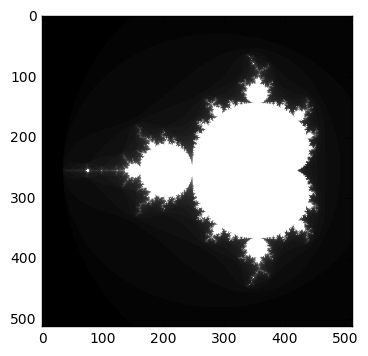

In [1]:
# 만델브로트 집합(Mandelbrot set)을 시각화 : 평면상의 각 점에 반복 횟수를 연계한 유명한 프택탈 모양이다
# 2D 정사각형 배열에 값을 먼저 채운후, 시각화하기 위해 pyplot.imshow() 호출
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def iter_count(C, max_iter):
    X = C
    for n in range(max_iter):
        if abs(X) > 2.:
            return n
        X = X**2 + C
    return max_iter

N = 512
max_iter = 64

xmin, xmax, ymin, ymax = -2.2, .8, -1.5, 1.5
X = np.linspace(xmin, xmax, N)
Y = np.linspace(ymin, ymax, N)
Z = np.empty((N, N))

for i, y in enumerate(Y):
    for j, x in enumerate(X):
        Z[i, j] = iter_count(complex(x, y), max_iter)
        
        
plt.imshow(Z, cmap=cm.gray)
plt.show()

<font color='gray' size=2> pyplot.imshow()에서 얻은 결과는 비트 기초 데이터(bit raw)
<font color='gray' size=2> 축에 표시한 좌표는 2D 배열 첨자다.
<font color='gray' size=2> cmap 파라미터는 컬러맵을 지정
<font color='gray' size=2> extent는 2D 배열에 저장된 데이터에 대한 좌표계를 지정

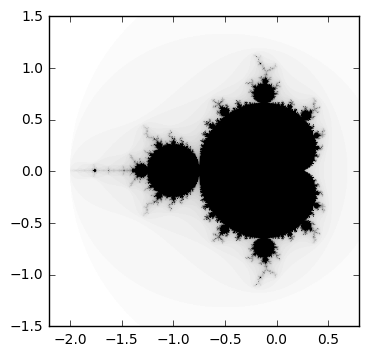

In [2]:
# 좌표계는 4개 값의 튜플로서, 수평축과 수직축에서 확장한 최대값과 최소값이다.

plt.imshow(Z, cmap=cm.binary, extent=(xmin, xmax, ymin, ymax))
plt.show()

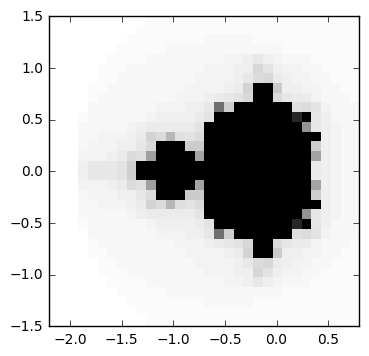

In [3]:
# 표본 데이터의 크기를 512에서 32로 줄여보자
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def iter_count(C, max_iter):
    X = C
    for n in range(max_iter):
        if abs(X) > 2.:
            return n
        X = X**2 + C
    return max_iter

N = 32
max_iter = 64

xmin, xmax, ymin, ymax = -2.2, .8, -1.5, 1.5
X = np.linspace(xmin, xmax, N)
Y = np.linspace(ymin, ymax, N)
Z = np.empty((N, N))

for i, y in enumerate(Y):
    for j, x in enumerate(X):
        Z[i, j] = iter_count(complex(x, y), max_iter)
        
plt.imshow(Z, cmap=cm.binary, interpolation='nearest', extent=(xmin, xmax, ymin, ymax))
plt.show()

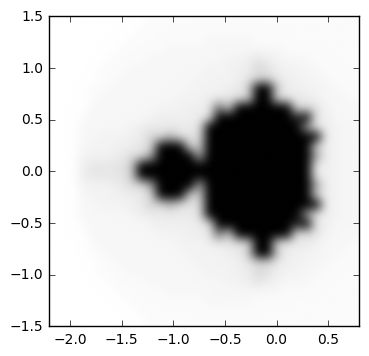

In [4]:
# 선형 보간 방식은 계산에 적게 들지만 보기에 좋지 않은 인공물을 만든다.

plt.imshow(Z, cmap=cm.binary, interpolation='bicubic', extent=(xmin, xmax, ymin, ymax))
plt.show()

### <font color='blue'> 컬러맵 범례를 그림에 추가

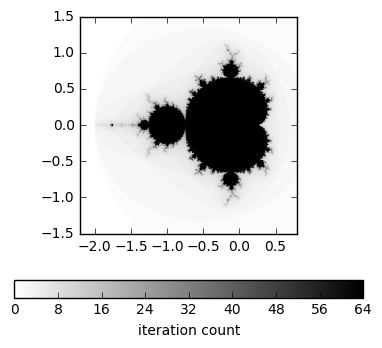

In [5]:
# pyplot.colorbar() : 컬러 막대는 컬러맵의 컬러를 관심값과 연계해준다.
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def iter_count(C, max_iter):
    X = C
    for n in range(max_iter):
        if abs(X) > 2.:
            return n
        X = X**2 + C
    return max_iter

N = 512
max_iter = 64

xmin, xmax, ymin, ymax = -2.2, .8, -1.5, 1.5
X = np.linspace(xmin, xmax, N)
Y = np.linspace(ymin, ymax, N)
Z = np.empty((N, N))

for i, y in enumerate(Y):
    for j, x in enumerate(X):
        Z[i, j] = iter_count(complex(x, y), max_iter)

plt.imshow(Z, 
           cmap = cm.binary,
           interpolation = 'bicubic',
           extent = (xmin, xmax, ymin, ymax))        
        
cb = plt.colorbar(orientation='horizontal', shrink=.75)
cb.set_label('iteration count')

plt.show()

### <font color='blue'> 비균등 2D 데이터 시각화

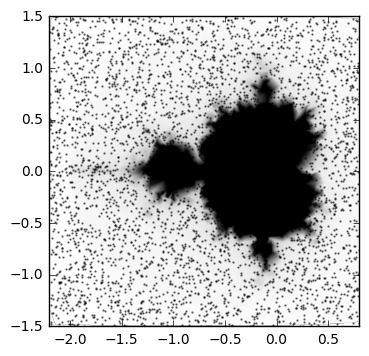

In [6]:
# 무작위뢰 표본화된 만델브로트 집합
# 표본점(sampling point)은 아주 작은 검은점으로 나타난다
import numpy as np
from numpy.random import uniform, seed
from matplotlib import pyplot as plt
from matplotlib.mlab import griddata
import matplotlib.cm as cm

def iter_count(C, max_iter):
    X = C 
    for n in range(max_iter):
        if abs(X) > 2.:
            return n
        X = X**2 + C
    return max_iter

max_iter = 64
xmin, xmax, ymin, ymax = -2.2, .8, -1.5, 1.5

sample_count = 2**12
A = uniform(xmin, xmax, sample_count)
B = uniform(ymin, ymax, sample_count)
C = [iter_count(complex(a, b), max_iter) for a, b in zip(A, B)]

N = 512
X = np.linspace(xmin, xmax, N)
Y = np.linspace(ymin, ymax, N)
Z = griddata(A, B, C, X, Y, interp='linear')

plt.scatter(A, B, color=(0., 0., 0., .5), s=.5)

plt.imshow(Z, 
           cmap = cm.binary,
           interpolation = 'bicubic',
           extent = (xmin, xmax, ymin, ymax))        

plt.show()


### <font color='blue'> 2D 스칼라장 시각화

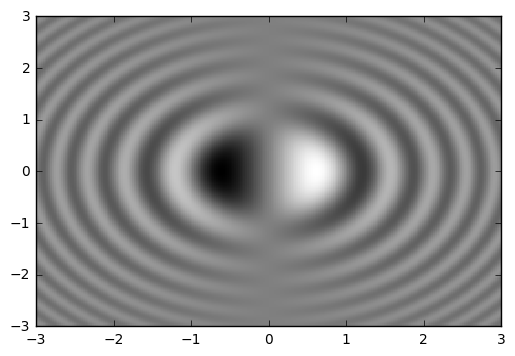

In [7]:
# numpy.meshgrid() : 명시적인 2D 함수로부터 표본을 생성
# 이 함수를 표시하기 위해 pyplot.pcolormesh()를 사용
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

n = 256
x = np.linspace(-3., 3., n)
y = np.linspace(-3., 3., n)

X, Y = np.meshgrid(x, y)
Z = X * np.sinc(X**2 + Y**2)

plt.pcolormesh(X, Y, Z, cmap=cm.gray)
plt.show()

### <font color='blue'> 등고선 시각화

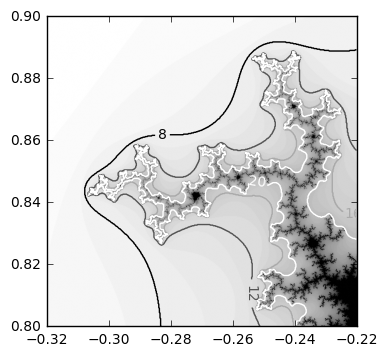

In [8]:
# pyplot.contour() : 표본 격자의 X와 Y좌표와 행렬 Z에 저장한 표본을 취한다.
# levels 리스트에서 지정한 값에 대응하는 등고선을 랜더링한다.
import numpy as np
import matplotlib.cm as cm
from matplotlib import pyplot as plt

def iter_count(C, max_iter):
    X = C 
    for n in range(max_iter):
        if abs(X) > 2.:
            return n
        X = X**2 + C
    return max_iter

max_iter = 64
xmin, xmax, ymin, ymax = -0.32, -0.22, 0.8, 0.9
N = 512
X = np.linspace(xmin, xmax, N)
Y = np.linspace(ymin, ymax, N)
Z = np.empty((N, N))

for i, y in enumerate(Y):
    for j, x in enumerate(X):
        Z[i, j] = iter_count(complex(x, y), max_iter)
        
plt.imshow(Z, 
           cmap = cm.binary,
           interpolation = 'bicubic',
           origin = 'lower',
           extent = (xmin, xmax, ymin, ymax))        

levels = [8, 12, 16, 20]
ct = plt.contour(X, Y, Z, levels, cmap=cm.gray)
plt.clabel(ct, fmt='%d')
plt.show()

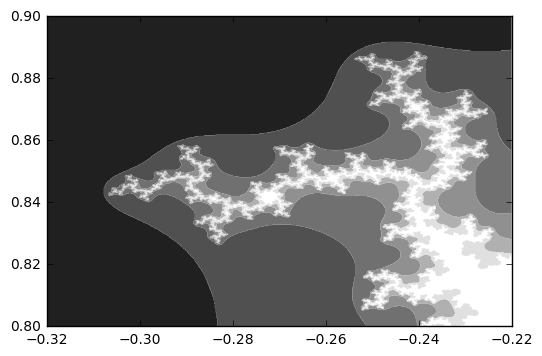

In [9]:
# pyplot.contour()를 pyplot.contourf()로 바꾼후, 등고선에 대한 추가레벨 사용
# 기본적으로 채운 antialiasing을 수행하지않고, 눈에 편한 선택적인 파라미터인 antialiased를 사용
import numpy as np
import matplotlib.cm as cm
from matplotlib import pyplot as plt

def iter_count(C, max_iter):
    X = C 
    for n in range(max_iter):
        if abs(X) > 2.:
            return n
        X = X**2 + C
    return max_iter

max_iter = 64
xmin, xmax, ymin, ymax = -0.32, -0.22, 0.8, 0.9
N = 512
X = np.linspace(xmin, xmax, N)
Y = np.linspace(ymin, ymax, N)
Z = np.empty((N, N))

for i, y in enumerate(Y):
    for j, x in enumerate(X):
        Z[i, j] = iter_count(complex(x, y), max_iter)
   

levels = [0, 8, 12, 16, 20, 24, 32]
plt.contourf(X, Y, Z, levels, cmap=cm.gray, antialiased=True)
plt.show()

### <font color='blue'> 2D 벡터장 시각화

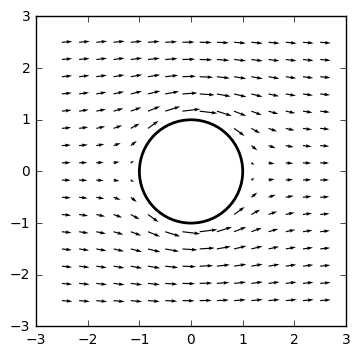

In [10]:
# 벡터장 시각화를 보여주기 우해 실린더를 둘러싼 비압축성 유체 흐름의 유속을 시각화
# 행렬 X, Y, U, V를 벡터장을 렌더링하는 pyplot.quiver()에 전달
import numpy as np
import sympy
from sympy.abc import x, y
import matplotlib.patches as patches
import matplotlib.pyplot as plt

def cylinder_stream_function(U = 1, R = 1):
    r = sympy.sqrt(x**2 + y**2)
    theta = sympy.atan2(y, x)
    return U * (r - R**2 / r) * sympy.sin(theta)

def velocity_field(psi):
    u = sympy.lambdify((x, y),  psi.diff(y), 'numpy')
    v = sympy.lambdify((x, y), -psi.diff(x), 'numpy')
    return u, v

U_func, V_func = velocity_field(cylinder_stream_function())

xmin, xmax, ymin, ymax = -2.5, 2.5, -2.5, 2.5
Y, X = np.ogrid[ymin:ymax:16j, xmin:xmax:16j]
U, V = U_func(X, Y), V_func(X, Y)

M = (X**2 + Y**2) < 1.
U = np.ma.masked_array(U, mask=M)
V = np.ma.masked_array(V, mask=M)

shape = patches.Circle((0, 0), radius=1., lw=2., fc='w', ec='k', zorder=0)
plt.gca().add_patch(shape)

plt.quiver(X, Y, U, V, zorder=1)

plt.axes().set_aspect('equal')
plt.show()

### <font color='blue'> 2D 벡터장의 유선 시각화

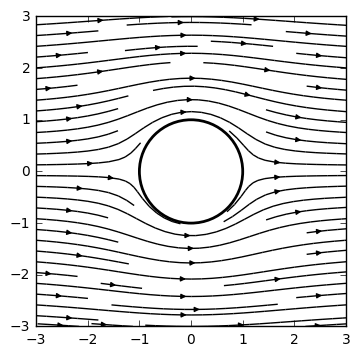

In [11]:
# 정확한 유속을 얻기 위해 많은 표본(32*32 대신 128*128)을 사용
# pyplot.quiver() 대신 pyplot.streamplot() 사용
import numpy as np
import sympy
from sympy.abc import x, y
import matplotlib.patches as patches
import matplotlib.pyplot as plt

def cylinder_stream_function(U = 1, R = 1):
    r = sympy.sqrt(x**2 + y**2)
    theta = sympy.atan2(y, x)
    return U * (r - R**2 / r) * sympy.sin(theta)

def velocity_field(psi):
    u = sympy.lambdify((x, y),  psi.diff(y), 'numpy')
    v = sympy.lambdify((x, y), -psi.diff(x), 'numpy')
    return u, v

psi = cylinder_stream_function()
U_func, V_func = velocity_field(psi)

xmin, xmax, ymin, ymax = -3, 3, -3, 3
Y, X = np.ogrid[ymin:ymax:128j, xmin:xmax:128j]
U, V = U_func(X, Y), V_func(X, Y)

M = (X**2 + Y**2) < 1.
U = np.ma.masked_array(U, mask=M)
V = np.ma.masked_array(V, mask=M)

shape = patches.Circle((0, 0), radius=1., lw=2., fc='w', ec='k', zorder=0)
plt.gca().add_patch(shape)

plt.streamplot(X, Y, U, V, color='k')

plt.axes().set_aspect('equal')
plt.show()

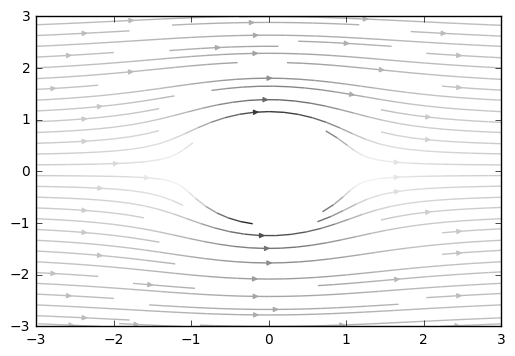

In [12]:
# 컬러맵을 선택적인 파라미터인 color와 cmap을 사용해 유선을 채색
plt.streamplot(X, Y, U, V, 
               color = U**2 + V**2, 
               cmap = cm.binary)

plt.show()